## Uludag Sozluk Sentiment Analysis

Goal:
    The articles written by uludag dictionary users were scraped and it was estimated what are the most used words in the written articles and whether the written articles would be liked by other users.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Uludag_Teknoloji.csv").drop("Unnamed: 0",axis=1)

In [3]:
df.head(2)

,Comment,Like,Dislike,Date
0,Gradient: DNA Ancestry Ai Test isimli uygulama...,2.0,-3.0,19.03.2020 15:14
1,Beni %81 türk göstermiş uygulama.\n\nCcc turan...,6.0,-1.0,19.03.2020 15:15


In [4]:
df.tail(2)

,Comment,Like,Dislike,Date
5897,(bkz: arkadaşlar düzeldi),NaN,NaN,30.11.2017 22:22
5898,Bozulduğunu eniştemden değil sözlükten öğrendi...,3.0,NaN,30.11.2017 22:24


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Comment  5834 non-null   object 
 1   Like     3603 non-null   float64
 2   Dislike  1485 non-null   float64
 3   Date     5899 non-null   object 
dtypes: float64(2), object(2)
memory usage: 184.5+ KB


In [6]:
df["Comment"]=df["Comment"].str.lower()
df["Comment"]=df["Comment"].str.replace("[^\w\s]","") #noktalama işaretlerini kaldır
df["Comment"]=df["Comment"].str.replace("\d+","") #d digit rakamları kaldır
df["Comment"]=df["Comment"].str.replace("\n"," ") #Satır sonu,\n 
df["Comment"]=df["Comment"].str.replace("\r","") #enter a basılmışsa \r
df["Comment"]=df["Comment"].str.replace("\t","")
df["Comment"]=df["Comment"].str.strip() #satır başında boşlukları kaldır 

In [7]:
df["Comment"]

0       gradient dna ancestry ai test isimli uygulama ...
1            beni  türk göstermiş uygulama  ccc turan ccc
2       filtreler yüzünden sadece burnu gözüken insanl...
3       benden için   rus  türk  iskoç  irlandalı çıka...
4                    beni vatikan çıkaran yavşak uygulama
                              ...                        
5894    düzeldi mesaj gönderdiğinde kanca yerine saat ...
5895    brezilyadan konuştuğum birisi onlarda da çöktü...
5896    benim için bir sorun teşkil etmeyen çökmedir s...
5897                               bkz arkadaşlar düzeldi
5898    bozulduğunu eniştemden değil sözlükten öğrendi...
Name: Comment, Length: 5899, dtype: object

In [8]:
df["Like"]=df["Like"].fillna(0)

In [9]:
df["Like"].value_counts()

0.0     2296
1.0     1411
2.0      855
3.0      540
4.0      293
5.0      151
6.0       90
7.0       70
9.0       49
8.0       48
11.0      30
10.0      15
18.0      10
15.0      10
12.0       8
14.0       7
13.0       7
17.0       3
24.0       2
28.0       1
16.0       1
25.0       1
31.0       1
Name: Like, dtype: int64

<AxesSubplot:xlabel='Like', ylabel='Density'>

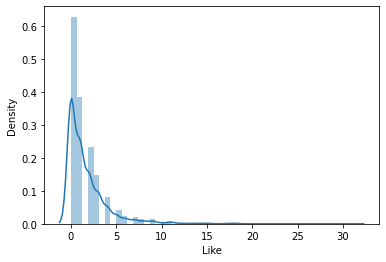

In [10]:
sns.distplot(df["Like"])

In [11]:
df["Dislike"]=df["Dislike"].fillna(0)

In [12]:
df["Dislike"].value_counts()

 0.0     4414
-1.0      866
-2.0      280
-3.0      149
-4.0       73
-5.0       47
-6.0       23
-7.0       17
-13.0      10
-10.0       7
-18.0       5
-12.0       2
-16.0       2
-9.0        1
-8.0        1
-15.0       1
-19.0       1
Name: Dislike, dtype: int64

<AxesSubplot:xlabel='Dislike', ylabel='Density'>

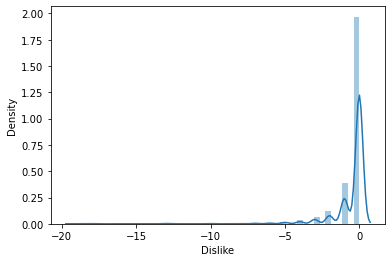

In [13]:
sns.distplot(df["Dislike"])

In [14]:
#Like ve Dislike toplandı ve tek satırda son durum gözlendi, Like çoksa +, dislike çoksa - işaretli sonuç olacaktır.
df["Total_Like"]=df["Like"]+df["Dislike"]
df.drop(["Like","Dislike"],axis=1,inplace=True)

<AxesSubplot:xlabel='Total_Like'>

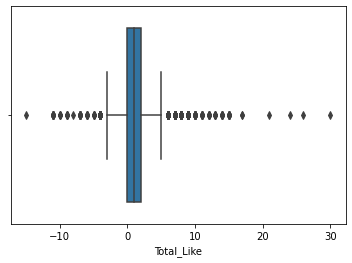

In [15]:
sns.boxplot(df["Total_Like"])

In [16]:
df["Date"]=pd.to_datetime(df["Date"])

df["Day"]=df["Date"].dt.dayofweek
df["Month"]=df["Date"].dt.month
df["Year"]=df["Date"].dt.year


df['WeekDay']=df['Date'].dt.day_name()
df['Month_Name']=df['Date'].dt.month_name()

df.drop("Date",axis=1,inplace=True)

<AxesSubplot:xlabel='WeekDay', ylabel='count'>

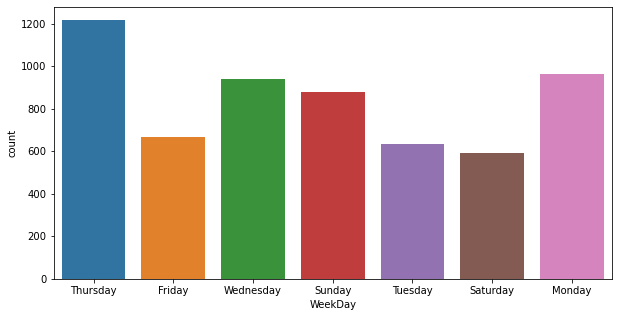

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(df["WeekDay"])
#En çok Perşembe günleri yazılmış.

<AxesSubplot:xlabel='Month_Name', ylabel='count'>

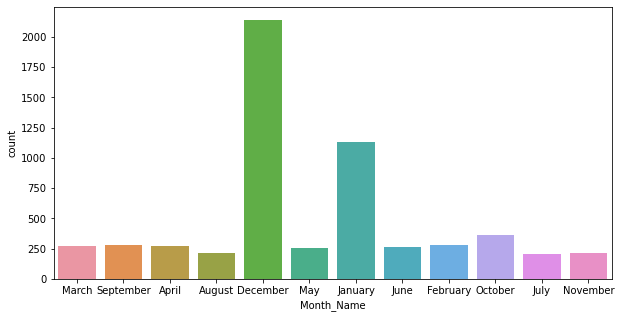

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(df["Month_Name"])
#En çok Aralık ayında yazılmış.

<AxesSubplot:xlabel='Year', ylabel='count'>

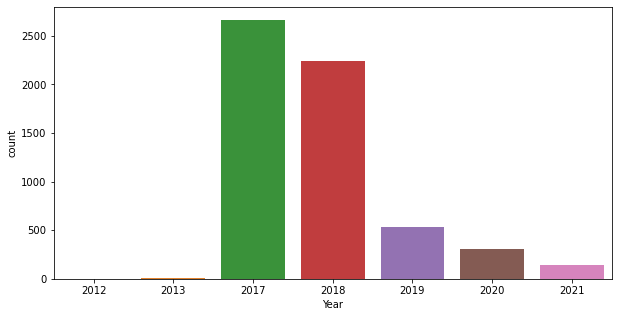

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(df["Year"])
#En çok 2017 yılında yazılmış.

In [20]:
df.corr()

,Total_Like,Day,Month,Year
Total_Like,1.000000,0.043483,0.006282,-0.116775
Day,0.043483,1.000000,0.110742,-0.207889
Month,0.006282,0.110742,1.000000,-0.345387
Year,-0.116775,-0.207889,-0.345387,1.000000


<AxesSubplot:>

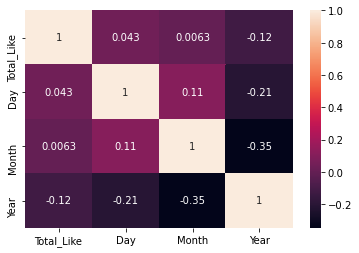

In [21]:
sns.heatmap(df.corr(),annot=True)

In [22]:
df.describe()

,Total_Like,Day,Month,Year
count,5899.000000,5899.000000,5899.000000,5899.000000
mean,1.146466,2.897779,7.430412,2017.807934
std,2.474058,1.976865,4.441248,0.990065
min,-15.000000,0.000000,1.000000,2012.000000
25%,0.000000,1.000000,3.000000,2017.000000
50%,1.000000,3.000000,9.000000,2018.000000
75%,2.000000,4.000000,12.000000,2018.000000
max,30.000000,6.000000,12.000000,2021.000000


## En çok geçen kelimeler?

In [23]:
#pip install wordcloud

In [24]:
from wordcloud import WordCloud
import nltk

In [25]:
df["Comment"] = df["Comment"].apply(str)
possitive_data=df[df["Total_Like"]>0]["Comment"]
negative_data=df[df["Total_Like"]<0]["Comment"]
neutral_data=df[df["Total_Like"]==0]["Comment"]

In [26]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\easan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
stop_word_list=nltk.corpus.stopwords.words("turkish")

In [28]:
def wc(data,bgcolor,image):
    from PIL import Image
    mask = np.array(Image.open(image))
    wc=WordCloud(background_color=bgcolor, width=800, height=400,mask=mask,max_words=200,stopwords=stop_word_list).generate(' '.join(data))
    plt.figure( figsize=(20,10) )
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

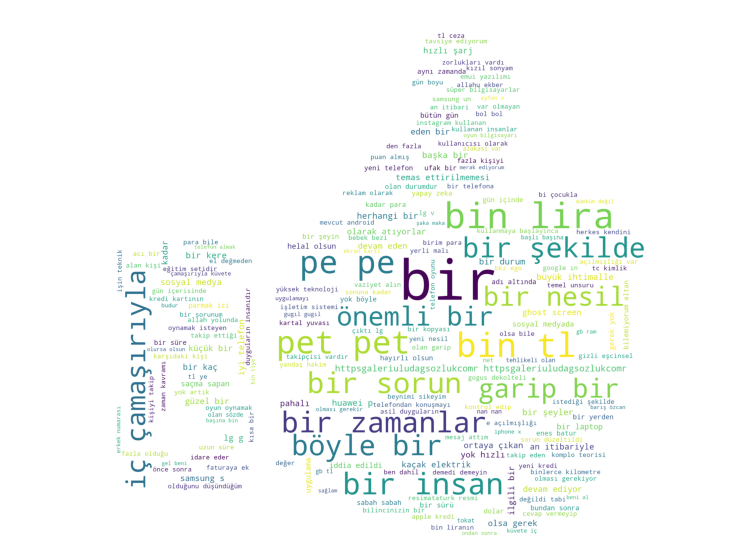

In [29]:
wc(possitive_data,"white","upvote.png")

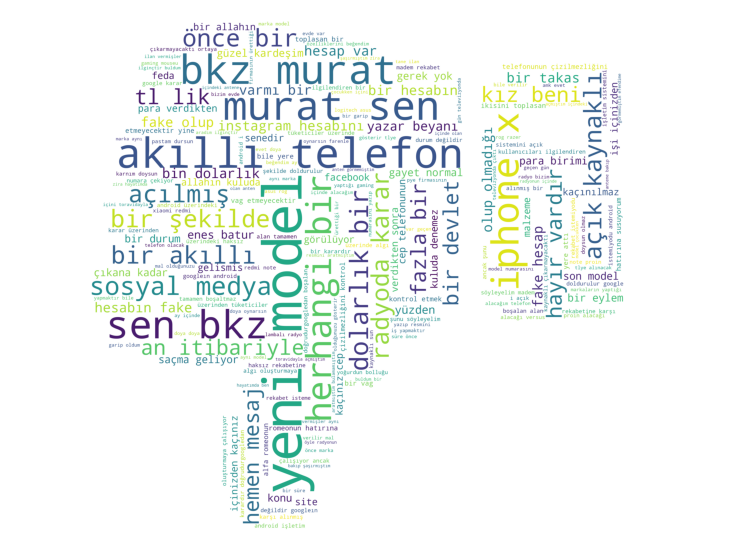

In [30]:
wc(negative_data,"white","downvote.png")

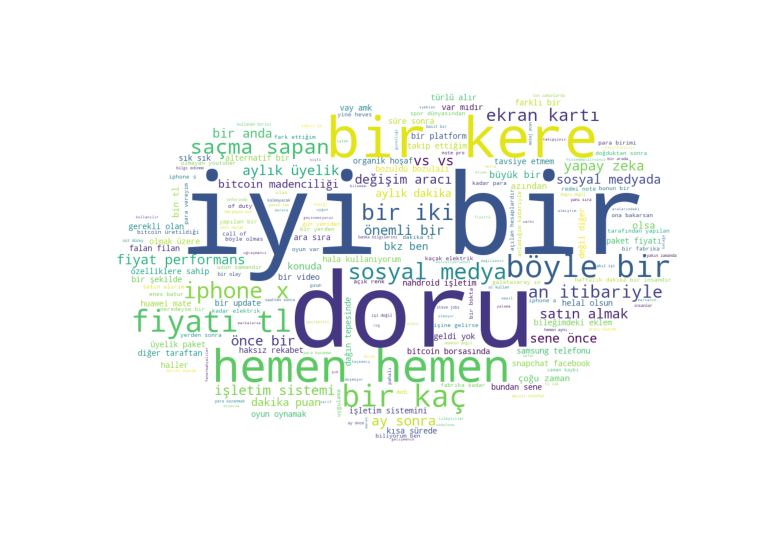

In [32]:
wc(neutral_data,"white","cloud.png")

## Yazılan yazının beğeni alıp alamayacağınu bulalım

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [45]:
df.loc[df['Total_Like']==0,"sentiment"]="neutral"
df.loc[df['Total_Like']<0,"sentiment"]="negative"
df.loc[df['Total_Like']>0,"sentiment"]="positive"

In [46]:
x,y=df['Comment'],df['sentiment']

In [47]:
x.shape,y.shape

((5899,), (5899,))

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=60)

In [49]:
x_train

3585                                       hatta bataklik
3888    al fakat bende mat siyah var metal arka kapak ...
865     googleye dünya lideri yazınca hep karizma bir ...
2572    yan etkileri işitme kaybı şiddetli halüsinasyo...
2511    kaynakgötüm kaynak httpswwwyoutubecomcucmzlbde...
                              ...                        
2147    en azından umut verip yolda bırakmamış en iyis...
1418    bilgisayarda android deneyimi yaşamak için kul...
3654    tumblr kızı her türlü alır artık tumblr kızlar...
3137    an itibariyle fark ettiğim artan talep sebebiy...
2253    yurt dışında nerdeyse bedavaya gelirken bizim ...
Name: Comment, Length: 4424, dtype: object

In [50]:
x_test

4649    güya iphone x ile girdiğin bu entryi kolunda b...
5677    bir tohat sıporlu olaraktan canı gönülden dest...
2305    aranan karşıdaki kişi daha açar açmaz aloooğğğ...
1517    facebooka artık takilmadığım için yaşlı teyze ...
3562    instagramın muta nikahı güncellemesiyle sorun ...
                              ...                        
2616    iphoneun ucuz modeli sadece beş buçuk milyortr...
2692    milletin ordan burdan fikirler çalarak saçma s...
1046                                                  nan
5296    bir adet soru işareti ile vuku bulan anlamsız ...
212     inç ekran boyutu  gb dahili depolama  gb belle...
Name: Comment, Length: 1475, dtype: object

In [51]:
y_train

3585    positive
3888    positive
865      neutral
2572    positive
2511    negative
          ...   
2147     neutral
1418     neutral
3654     neutral
3137     neutral
2253     neutral
Name: sentiment, Length: 4424, dtype: object

In [52]:
y_test

4649     neutral
5677    positive
2305    positive
1517     neutral
3562     neutral
          ...   
2616     neutral
2692    positive
1046     neutral
5296    negative
212      neutral
Name: sentiment, Length: 1475, dtype: object

In [53]:
vect=CountVectorizer()
x_train_dtm=vect.fit_transform(x_train,y_train)
x_test_dtm=vect.transform(x_test)

In [54]:
x_train_dtm.shape,x_test_dtm.shape

((4424, 12873), (1475, 12873))

In [55]:
def tokenize_test(vect,x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier #yüklemek için !pip install xgboost kullandım
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=60)
    
    print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
    
    g=GaussianNB()
    b=BernoulliNB()
    SVC=SVC()
    KN=KNeighborsClassifier()
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGBC=XGBClassifier()
    
    algos=[g,b,SVC,KN,D,R,Log,XGBC]
    algo_names=['GaussianNB','BernoulliNB','SVC','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']   
    
    accuracy_scored=[]    
        
    x_train_dtm=vect.fit_transform(x_train).toarray()
    x_test_dtm=vect.transform(x_test).toarray()
    
    for item in algos:
        item.fit(x_train_dtm,y_train)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test_dtm)))
    result=pd.DataFrame(accuracy_scored,columns=['accuracy_score'],index=algo_names)
    result.accuracy_score=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)  

In [56]:
vect=CountVectorizer()
tokenize_test(vect,x,y)

(4719,) (1180,) (4719,) (1180,)
[02:49:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,accuracy_score
RandomForestClassifier,0.949153
LogisticRegression,0.943220
DecisionTreeClassifier,0.938136
SVC,0.926271
GaussianNB,0.913559
KNeighborsClassifier,0.894915
BernoulliNB,0.873729
XGBClassifier,0.844068


In [57]:
#Görüldüğü gibi RandomForestClassifier ile yazılan bir yorumun beğeni alıp almayacağınu %95 oranında tahmin etmiş olduk.